In [3]:
import pandas as pd

# Caminho para o arquivo Parquet
caminho_arquivo = "C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/Sisaweb/notificacoes_count.parquet"

# Leitura do arquivo Parquet para um DataFrame
df = pd.read_parquet(caminho_arquivo)

# Exibir as primeiras linhas do DataFrame
print(df.head())


  mes_ano  notificacoes       censitario quarteirao  \
0  202201             2  354980505000001       4456   
1  202201             1  354980505000001       4528   
2  202201             1  354980505000004       4448   
3  202201             1  354980505000005       4497   
4  202201             1  354980505000010       4568   

                                            geometry  
0  b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\r\x00\x...  
1  b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\r\x00\x...  
2  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00#\x00\x0...  
3  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...  
4  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\r\x00\x...  


In [4]:
# Caminho para o arquivo CSV de saída
caminho_csv = "notificacoes_count.csv"

# Salvar o  DataFrame como CSV
df.to_csv(caminho_csv, index=False)  # index=False para evitar salvar o índice

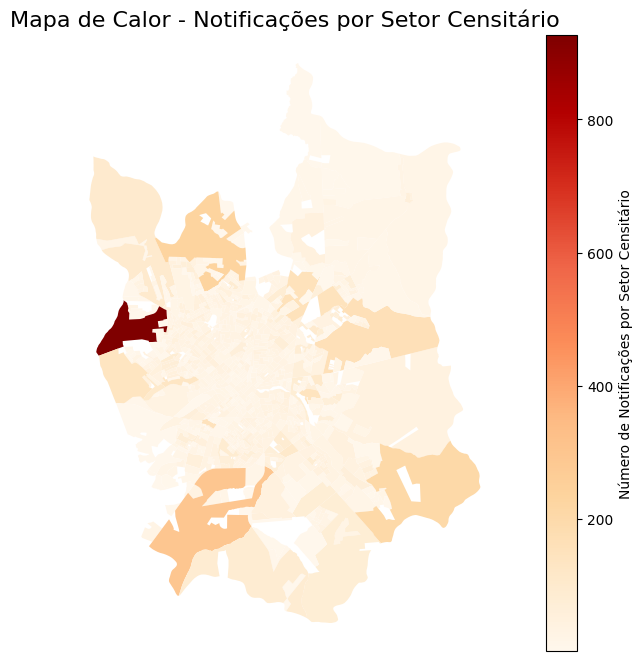

,mes_ano,notificacoes,censitario,quarteirao,geometry
0,202201,2,354980505000001,4456,"POLYGON ((-49.37951 -20.81252, -49.38019 -20.8..."
1,202201,1,354980505000001,4528,"POLYGON ((-49.37951 -20.81252, -49.38019 -20.8..."
2,202201,1,354980505000004,4448,"POLYGON ((-49.37517 -20.80843, -49.37496 -20.8..."
3,202201,1,354980505000005,4497,"POLYGON ((-49.37551 -20.81109, -49.37594 -20.8..."
4,202201,1,354980505000010,4568,"POLYGON ((-49.38159 -20.81448, -49.38227 -20.8..."
...,...,...,...,...,...
19607,202312,2,354980520000019,572,"POLYGON ((-49.33212 -20.71101, -49.33318 -20.7..."
19608,202312,1,354980520000019,574,"POLYGON ((-49.33212 -20.71101, -49.33318 -20.7..."
19609,202312,4,354980520000019,604,"POLYGON ((-49.33212 -20.71101, -49.33318 -20.7..."
19610,202312,1,354980520000020,9304,"POLYGON ((-49.29536 -20.70588, -49.2952 -20.70..."


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Verifique se a coluna 'geometry' está corretamente interpretada
df['geometry'] = gpd.GeoSeries.from_wkb(df['geometry'])

# Converter para GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Agrupar os dados por setor censitário, somando as notificações
gdf_agrupado = gdf.groupby('censitario').agg({
    'notificacoes': 'sum',
    'geometry': 'first'  # Preservar a geometria do setor censitário
}).reset_index()

# Criar um GeoDataFrame para visualização
gdf_agrupado = gpd.GeoDataFrame(gdf_agrupado, geometry='geometry')

# Configurar o plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_agrupado.plot(
    column='notificacoes',
    cmap='OrRd',  # Mapa de cores
    legend=True,
    legend_kwds={'label': "Número de Notificações por Setor Censitário"},
    ax=ax
)

# Adicionar título e ajustar layout
ax.set_title("Mapa de Calor - Notificações por Setor Censitário", fontsize=16)
ax.set_axis_off()

# Exibir o mapa
plt.show()
df 

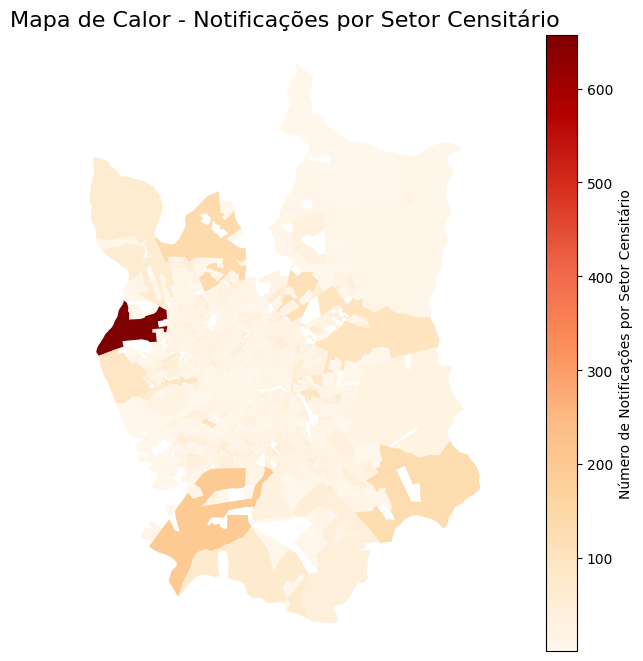

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

def plot_mapa_calor(parquet_file, data_inicio=None, data_fim=None):
    """
    Gera um mapa de calor de notificações por setor censitário, filtrando por intervalo de datas.
    
    Args:
        parquet_file (str): Caminho para o arquivo Parquet.
        data_inicio (str): Data inicial no formato 'YYYYMM' (default: None, sem filtro inferior).
        data_fim (str): Data final no formato 'YYYYMM' (default: None, sem filtro superior).
    """
    # Leitura do arquivo Parquet
    df = pd.read_parquet(parquet_file)

    # Garantir que a coluna 'mes_ano' é string para comparação
    df['mes_ano'] = df['mes_ano'].astype(str)

    # Filtro por intervalo de datas
    if data_inicio:
        df = df[df['mes_ano'] >= data_inicio]
    if data_fim:
        df = df[df['mes_ano'] <= data_fim]

    # Verifique se a coluna 'geometry' está corretamente interpretada
    df['geometry'] = gpd.GeoSeries.from_wkb(df['geometry'])

    # Converter para GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')

    # Agrupar os dados por setor censitário, somando as notificações
    gdf_agrupado = gdf.groupby('censitario').agg({
        'notificacoes': 'sum',
        'geometry': 'first'  # Preservar a geometria do setor censitário
    }).reset_index()

    # Criar um GeoDataFrame para visualização
    gdf_agrupado = gpd.GeoDataFrame(gdf_agrupado, geometry='geometry')

    # Configurar o plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf_agrupado.plot(
        column='notificacoes',
        cmap='OrRd',  # Mapa de cores
        legend=True,
        legend_kwds={'label': "Número de Notificações por Setor Censitário"},
        ax=ax
    )

    # Adicionar título e ajustar layout
    ax.set_title("Mapa de Calor - Notificações por Setor Censitário", fontsize=16)
    ax.set_axis_off()

    # Exibir o mapa
    plt.show()

# Exemplo de uso:
parquet_file = "C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/Sisaweb/notificacoes_count.parquet"

# Intervalo de datas para o filtro
data_inicio = "202201"  # Data inicial no formato YYYYMM
data_fim = "202212"     # Data final no formato YYYYMM

plot_mapa_calor(parquet_file, data_inicio=data_inicio, data_fim=data_fim)


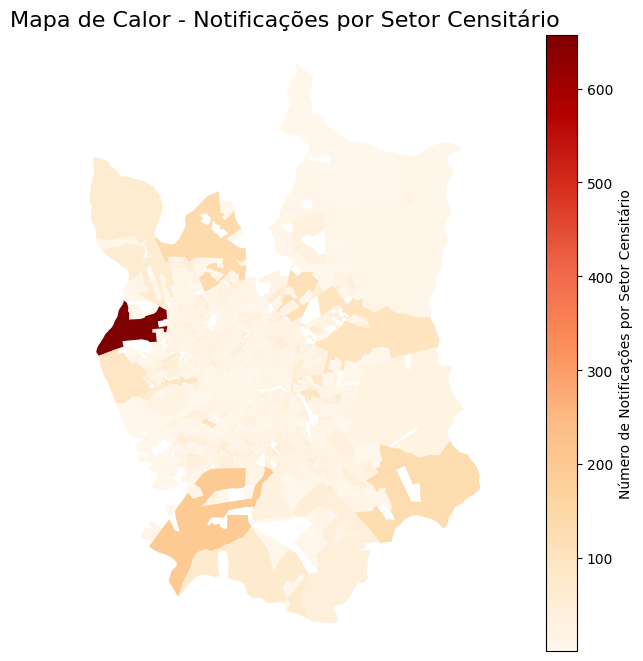

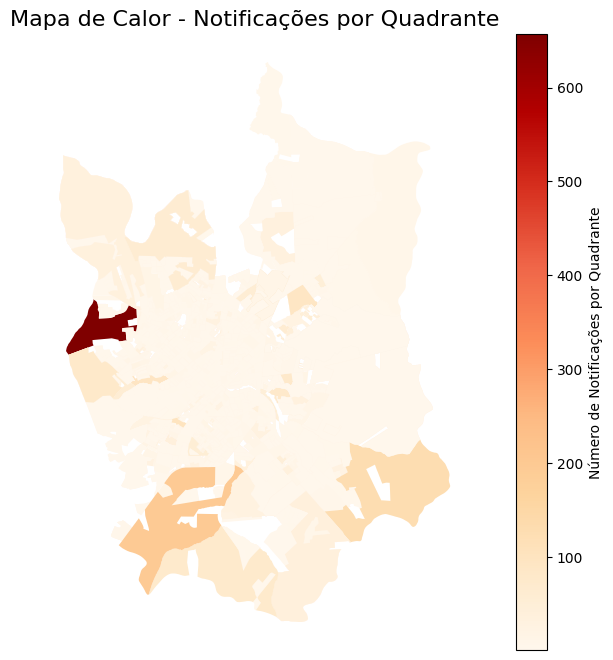

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

def plot_mapa_calor(parquet_file, data_inicio=None, data_fim=None, por_quadrante=False):
    """
    Gera um mapa de calor de notificações por setor censitário ou agrupado por quadrantes.
    
    Args:
        parquet_file (str): Caminho para o arquivo Parquet.
        data_inicio (str): Data inicial no formato 'YYYYMM' (default: None, sem filtro inferior).
        data_fim (str): Data final no formato 'YYYYMM' (default: None, sem filtro superior).
        por_quadrante (bool): Se True, agrupa por quadrantes em vez de setores censitários.
    """
    # Leitura do arquivo Parquet
    df = pd.read_parquet(parquet_file)

    # Garantir que a coluna 'mes_ano' é string para comparação
    df['mes_ano'] = df['mes_ano'].astype(str)

    # Filtro por intervalo de datas
    if data_inicio:
        df = df[df['mes_ano'] >= data_inicio]
    if data_fim:
        df = df[df['mes_ano'] <= data_fim]

    # Verifique se a coluna 'geometry' está corretamente interpretada
    df['geometry'] = gpd.GeoSeries.from_wkb(df['geometry'])

    # Converter para GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')

    # Seleção de agrupamento (setor censitário ou quadrante)
    agrupamento = 'quarteirao' if por_quadrante else 'censitario'

    # Agrupar os dados pelo agrupamento selecionado, somando notificações
    gdf_agrupado = gdf.groupby(agrupamento).agg({
        'notificacoes': 'sum',
        'geometry': 'first'  # Preservar a geometria
    }).reset_index()

    # Criar um GeoDataFrame para visualização
    gdf_agrupado = gpd.GeoDataFrame(gdf_agrupado, geometry='geometry')

    # Configurar o plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf_agrupado.plot(
        column='notificacoes',
        cmap='OrRd',  # Mapa de cores
        legend=True,
        legend_kwds={'label': f"Número de Notificações por {'Quadrante' if por_quadrante else 'Setor Censitário'}"},
        ax=ax
    )

    # Adicionar título e ajustar layout
    ax.set_title(f"Mapa de Calor - Notificações por {'Quadrante' if por_quadrante else 'Setor Censitário'}", fontsize=16)
    ax.set_axis_off()

    # Exibir o mapa
    plt.show()

# Exemplo de uso:
parquet_file = "C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/Sisaweb/notificacoes_count.parquet"

# Intervalo de datas para o filtro
data_inicio = "202201"  # Data inicial no formato YYYYMM
data_fim = "202212"     # Data final no formato YYYYMM

# Mapa por setor censitário
plot_mapa_calor(parquet_file, data_inicio=data_inicio, data_fim=data_fim, por_quadrante=False)

# Mapa por quadrante
plot_mapa_calor(parquet_file, data_inicio=data_inicio, data_fim=data_fim, por_quadrante=True)


Setor censitário com mais casos:
  - Setor: 354980505001017
  - Total de Notificações: 927


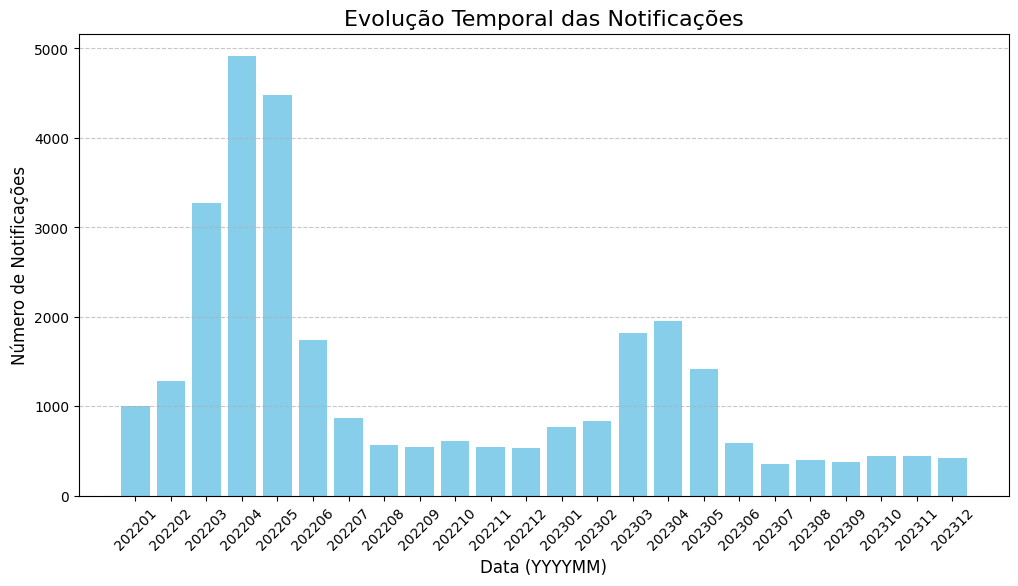

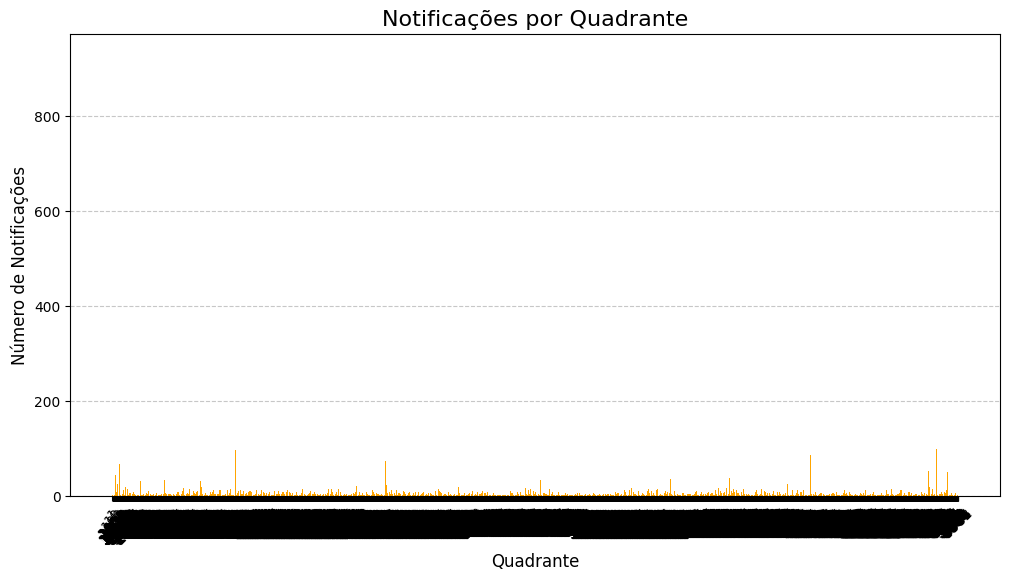

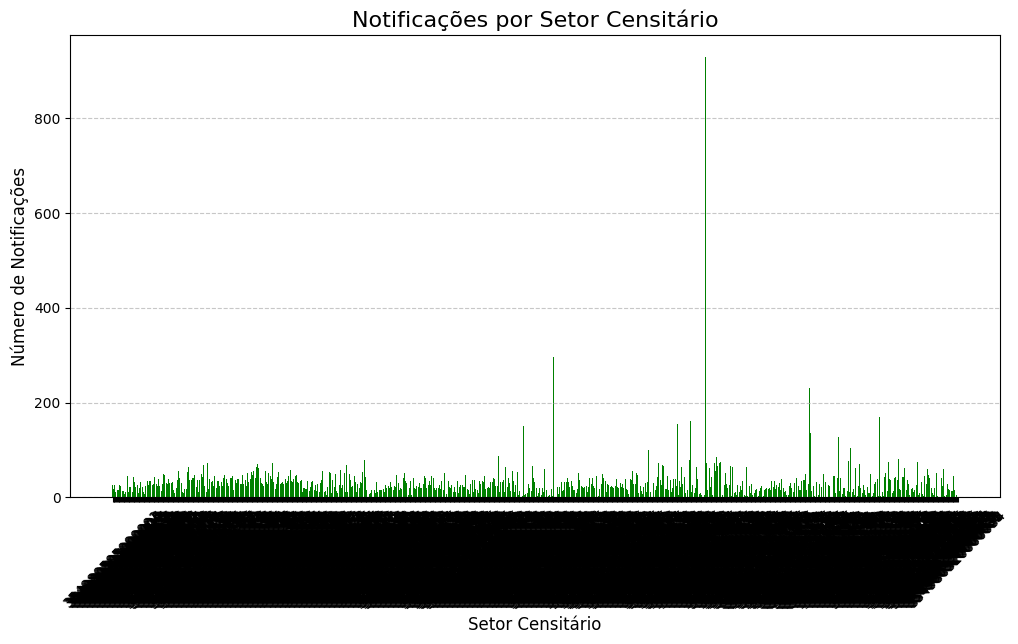

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def setor_censitario_com_mais_casos(df):
    """
    Identifica o setor censitário com o maior número de notificações.
    """
    # Agrupar por setor censitário e somar notificações
    df_agrupado = df.groupby('censitario')['notificacoes'].sum().reset_index()

    # Encontrar o setor com o maior número de notificações
    setor_mais_casos = df_agrupado.loc[df_agrupado['notificacoes'].idxmax()]

    print(f"Setor censitário com mais casos:")
    print(f"  - Setor: {setor_mais_casos['censitario']}")
    print(f"  - Total de Notificações: {setor_mais_casos['notificacoes']}")

    return setor_mais_casos

def plot_barras_por_data(df):
    """
    Gera um gráfico de barras mostrando o número de notificações ao longo do tempo.
    """
    df_agrupado = df.groupby('mes_ano')['notificacoes'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.bar(df_agrupado['mes_ano'], df_agrupado['notificacoes'], color='skyblue')
    plt.xlabel('Data (YYYYMM)', fontsize=12)
    plt.ylabel('Número de Notificações', fontsize=12)
    plt.title('Evolução Temporal das Notificações', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_barras_por_quadrante(df):
    """
    Gera um gráfico de barras mostrando o número de notificações por quadrante.
    """
    df_agrupado = df.groupby('quarteirao')['notificacoes'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.bar(df_agrupado['quarteirao'], df_agrupado['notificacoes'], color='orange')
    plt.xlabel('Quadrante', fontsize=12)
    plt.ylabel('Número de Notificações', fontsize=12)
    plt.title('Notificações por Quadrante', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_barras_por_setor_censitario(df):
    """
    Gera um gráfico de barras mostrando o número de notificações por setor censitário.
    """
    df_agrupado = df.groupby('censitario')['notificacoes'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.bar(df_agrupado['censitario'], df_agrupado['notificacoes'], color='green')
    plt.xlabel('Setor Censitário', fontsize=12)
    plt.ylabel('Número de Notificações', fontsize=12)
    plt.title('Notificações por Setor Censitário', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Exemplo de uso:
parquet_file = "C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/Sisaweb/notificacoes_count.parquet"
df = pd.read_parquet(parquet_file)

# Garantir que a coluna mes_ano seja string para manipulação de datas
df['mes_ano'] = df['mes_ano'].astype(str)

# Identificar setor censitário com mais casos
setor_com_mais_casos = setor_censitario_com_mais_casos(df)

# Gráficos
plot_barras_por_data(df)
plot_barras_por_quadrante(df)
plot_barras_por_setor_censitario(df)
